In [1]:
# @title Importacion de librerias

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

**El método de Runge-Kutta de orden cuatro**

El método de Runge-Kutta de orden cuatro es un método numérico para resolver ecuaciones diferenciales ordinarias. Se basa en aproximar la solución a 

\begin{equation}
\frac{\mathrm{d}y}{\mathrm{d}t} = f(t, y)
\end{equation}

con condiciones iniciales $y(t_0)=y_0$ a:


\begin{equation}
y_{n+1} = y_n + \frac{h}{6}(k_1 + 2k_2 + 2k_3 + k_4)
\end{equation}

donde $h$ es el tamaño del paso y
\begin{equation}
k_1 = f(x_n, y_n)
\end{equation}
\begin{equation}
k_2 = f(x_n + \frac{h}{2}, y_n + \frac{h}{2}k_1)
\end{equation}
\begin{equation}
k_3 = f(x_n + \frac{h}{2}, y_n + \frac{h}{2}k_2)
\end{equation}
\begin{equation}
k_4 = f(x_n + h, y_n + hk_3)
\end{equation}
El orden de convergencia del método es cuatro, lo que significa que el error local es proporcional a $h^5$ y el error global es proporcional a $h^4$.



In [2]:
def fun(t,y,params):
  a=params[0]
  dydt=-a*y

  return dydt



In [3]:
#Ponemos a prueba la funcion

a=1
params=(a,)
fun(0,1,params)

-1

In [4]:
# Condiciones Iniciales

t0=0.0      # Tiempo inicial
tfin=1      # Tiempo final
Nt= 100
t=np.linspace(t0,tfin,Nt)

y0=100

a=1
params=(a,)

h=(tfin-t0)/Nt



In [5]:
k1=fun(t0,y0,params)
k2=fun(t0 +h/2,y0+(h/2)*k1,params)
k3=fun(t0 +h/2,y0+(h/2)*k2,params)
k4=fun(t0 +h,  y0+ h*k3   ,params)

kmean=(1/6)*(k1+2*k2+2*k3+k4)


y1=y0 + kmean*h

In [7]:
t1=t0+h

k1=fun(t1,y1,params)
k2=fun(t1 +h/2,y1+(h/2)*k1,params)
k3=fun(t1 +h/2,y1+(h/2)*k2,params)
k4=fun(t1 +h,  y1+ h*k3   ,params)

kmean=(1/6)*(k1+2*k2+2*k3+k4)


y2=y1 + kmean*h

y2

98.01986733084026

In [8]:
#Construccion del ciclo final para el programa de Runge-Kutta

t0=0.0      # Tiempo inicial
tfin=1      # Tiempo final
Nt= 100     # Numero de instantes
t=np.linspace(t0,tfin,Nt)
y=np.zeros_like(t)
y[0]=y0
h=(tfin-t0)/Nt


ti=t0             # inicializar la variable que va a iterarse en el ciclo for
for i in range(Nt-1):

  k1=fun(ti,y[i],params)
  k2=fun(ti +h/2,y[i]+(h/2)*k1,params)
  k3=fun(ti +h/2,y[i]+(h/2)*k2,params)
  k4=fun(ti +h,  y[i]+ h*k3   ,params)
  kmean=(1/6)*(k1+2*k2+2*k3+k4)
  
  y[i+1]=y[i]+h*kmean
  ti=ti+h


y

array([100.        ,  99.00498337,  98.01986733,  97.04455336,
        96.07894392,  95.12294245,  94.17645336,  93.23938199,
        92.31163464,  91.39311853,  90.4837418 ,  89.58341353,
        88.69204367,  87.80954309,  86.93582354,  86.07079764,
        85.2143789 ,  84.36648166,  83.52702114,  82.6959134 ,
        81.87307531,  81.0584246 ,  80.2518798 ,  79.45336025,
        78.66278611,  77.88007831,  77.10515858,  76.33794944,
        75.57837415,  74.82635676,  74.08182207,  73.34469562,
        72.61490371,  71.89237335,  71.17703228,  70.46880897,
        69.76763261,  69.07343307,  68.38614092,  67.70568745,
        67.03200461,  66.36502502,  65.70468198,  65.05090947,
        64.40364211,  63.76281516,  63.12836455,  62.50022683,
        61.87833918,  61.26263942,  60.65306597,  60.04955788,
        59.4520548 ,  58.86049697,  58.27482524,  57.69498104,
        57.12090639,  56.55254387,  55.98983666,  55.43272848,
        54.88116361,  54.33508691,  53.79444376,  53.25

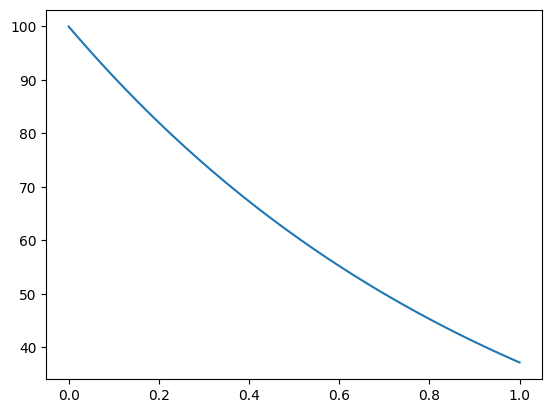

In [9]:
plt.plot(t,y)

**Atractor de Lorenz**

$\frac{dx}{dt}=a(y-x)$

$\frac{dy}{dt}=x(b-z)- y$

$\frac{dz}{dt}=xy -cz$



In [19]:
# Condiciones iniciales :

a=10.0
b=97.0
c=8./3
params=(a,b,c,)


t0=0.0      # Tiempo inicial
tfin=40.0  # Tiempo final
h=0.001
Nt= (tfin-t0)/h  # Numero de instantes
t=np.arange(t0,tfin, h)


r0=[1.,1.,1.]

x=np.zeros_like(t)
y=np.zeros_like(t)
z=np.zeros_like(t)

x[0] , y[0], z[0] = np.array(r0)





def fun(t,x,y,z,params):
  a=params[0]
  b=params[1]
  c=params[2]

  dxdt=a*(y-x)
  dydt=x*(b-z) -y
  dzdt=x*y -c*z

  return np.array([dxdt, dydt , dzdt])
  



In [28]:
ti=t0             # inicializar la variable que va a iterarse en el ciclo for

for i in range(0,len(t)-1):

  k1=fun(ti,x[i],y[i],z[i],params)[0]
  k2=fun(ti +h/2,x[i]+(h/2)*k1,y[i]+(h/2)*k1,z[i]+(h/2)*k1,params)[0]
  k3=fun(ti +h/2,x[i]+(h/2)*k2,y[i]+(h/2)*k2,z[i]+(h/2)*k2,params)[0]
  k4=fun(ti +h,  x[i]+ h*k3  ,y[i]+ h*k3 ,z[i]+ h*k3  ,params)[0]
  kmean=(1/6)*(k1+2*k2+2*k3+k4)
  

  q1=fun(ti,x[i],y[i],z[i],params)[1]
  q2=fun(ti +h/2,x[i]+(h/2)*q1,y[i]+(h/2)*q1,z[i]+(h/2)*q1,params)[1]
  q3=fun(ti +h/2,x[i]+(h/2)*q2,y[i]+(h/2)*q2,z[i]+(h/2)*q2,params)[1]
  q4=fun(ti +h,  x[i]+ h*q3 ,y[i]+ h*q3  ,z[i]+ h*q3 ,params)[1]
  qmean=(1/6)*(q1+2*q2+2*q3+q4)
  

  
  p1=fun(ti,x[i],y[i],z[i],params)[2]
  p2=fun(ti +h/2,x[i]+(h/2)*p1,y[i]+(h/2)*p1,z[i]+(h/2)*p1,params)[2]
  p3=fun(ti +h/2,x[i]+(h/2)*p2,y[i]+(h/2)*p2,z[i]+(h/2)*p2,params)[2]
  p4=fun(ti +h,x[i]+ h*p3  ,y[i]+ h*p3  ,  z[i]+ h*p3   ,params)[2]
  pmean=(1/6)*(p1+2*p2+2*p3+p4)

  x[i+1] = x[i] + h*kmean
  y[i+1] = y[i] + h*qmean
  z[i+1] = z[i] + h*pmean

  ti=ti+h



In [27]:
kmean

201.4430453705118

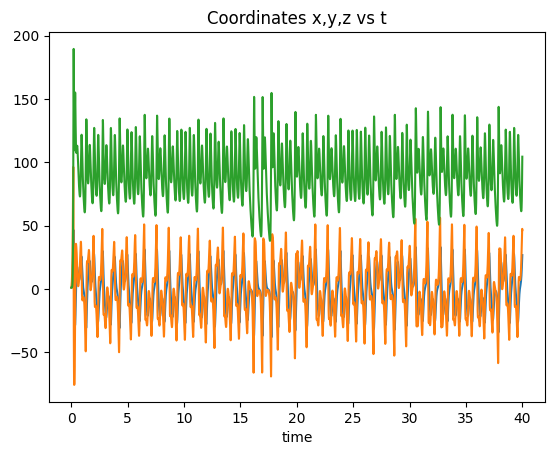

In [29]:
plt.title('Coordinates x,y,z vs t')
plt.xlabel('time')
plt.plot(t,x)
plt.plot(t,y)
plt.plot(t,z)


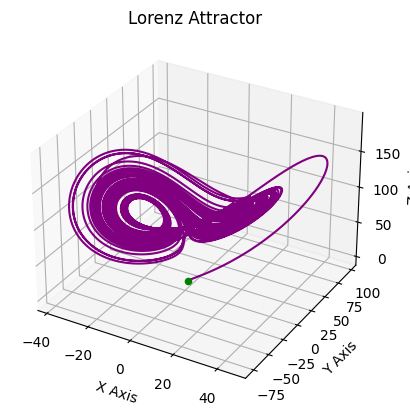

In [30]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.plot(x, y, z,'-',color='purple')
ax.scatter(x[1],y[1],z[1],color='green')
ax.set_xlabel("X Axis")
ax.set_ylabel("Y Axis")
ax.set_zlabel("Z Axis")
ax.set_title("Lorenz Attractor")

plt.show()

In [ ]:
#Solucion mediante el metodo ode-int de la libreria scipy:

# Defincion de las funciones conocidas dentro de cada ecuacion diferencial del sistema

def Func_vect(x,y,z,t,params):
  a=params[0]
  b=params[1]
  c=params[2]
  dxdt=a*(y-x)
  dydt=x*(b-z) -y
  dzdt=x*y -c*z
  return np.array([dxdt, dydt ,dzdt])




# Definicion de parametros , condiciones iniciales e inicializacion de variables y arreglos del problema.


a=28.0
b=10.0
c=8/3


params=(a,b,c,)



t0=0.0      # Tiempo inicial
tfin=30     # Tiempo final
Nt= 1000     # Numero de instantes
t=np.linspace(t0,tfin,Nt)
h=(tfin-t0)/Nt

x0=1.0
y0=1.0
z0=1.0



state_0=np.array([x0,y0,z0])

Func_vect(4,5,7,t,params)


array([1.        , 1.        , 1.01943885, ..., 4.89897949, 4.89897949,
       4.89897949])

In [ ]:
sol=odeint(Func_vect, state_0[0],state_0[1],state_0[2],t,args = params)